# Mobile Price Classification (Bagging vs Random Forest Classifier)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Set a consistent style for visualizations

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Load the training dataset

In [3]:
df_train = pd.read_csv("train.csv")

In [4]:
print("--- Initial Data Overview ---")
print("Shape of the training data:", df_train.shape)
print("\nFirst 5 rows of the dataset:")
print(df_train.head())

--- Initial Data Overview ---
Shape of the training data: (2000, 21)

First 5 rows of the dataset:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        

In [5]:
# Get a summary of the data, including data types and non-null counts
print("\n--- Dataset Information ---")
df_train.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non

In [6]:
# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df_train.describe().T)


--- Descriptive Statistics ---
                count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_wid

 **Insight:** The dataset contains 20 features and one target variable, 'price_range'.
 The data types are all integers or floats, and there are no missing values,
 which simplifies our initial preprocessing.

## Detailed Exploratory Data Analysis (EDA)

 This section focuses on gaining deeper insights into the dataset through
 visualizations and statistical analysis. We'll examine distributions,
 relationships between features, and the relationship between features and the target.

### Target Variable Analysis: 'price_range'

 The 'price_range' is our target variable. It's a categorical variable with
 four classes (0, 1, 2, 3). Let's check for class distribution and balance.


--- Target Variable Distribution ---
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


C:\Users\91629\AppData\Local\Temp\ipykernel_24192\826398206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df_train, palette='viridis')


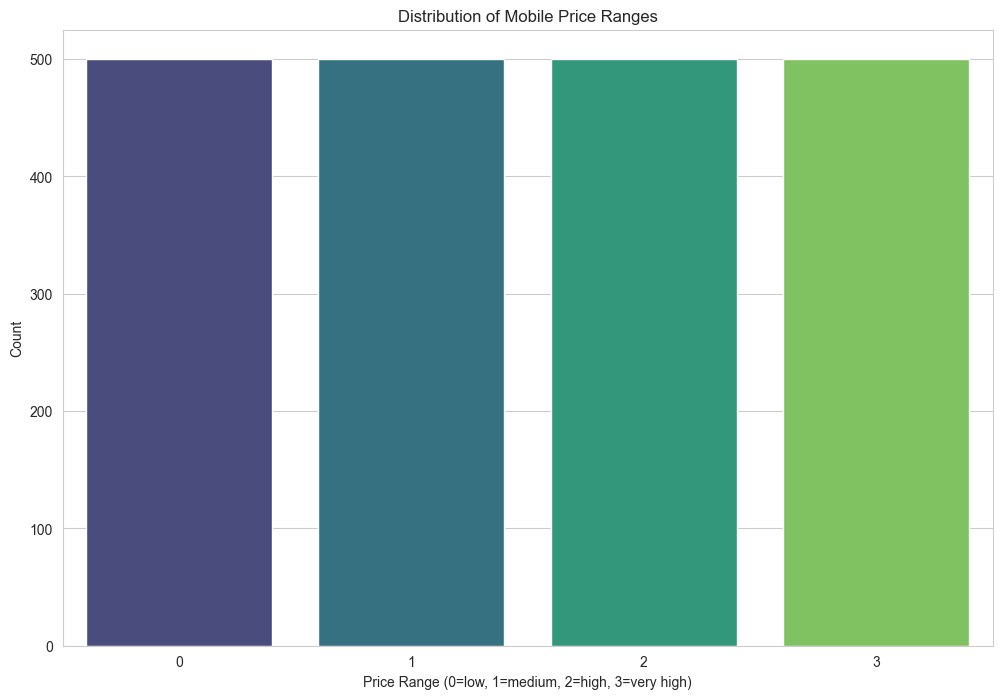

In [7]:
print("\n--- Target Variable Distribution ---")
print(df_train['price_range'].value_counts())
sns.countplot(x='price_range', data=df_train, palette='viridis')
plt.title('Distribution of Mobile Price Ranges')
plt.xlabel('Price Range (0=low, 1=medium, 2=high, 3=very high)')
plt.ylabel('Count')
plt.show()

 **Insight:** The classes are perfectly balanced, with 500 instances each. This is
 ideal for a classification problem as it means we don't need to worry about
 class imbalance techniques.

### Univariate Analysis of Numerical Features

 Let's visualize the distribution of key numerical features.
 We'll use histograms to check for skewness and identify potential outliers.

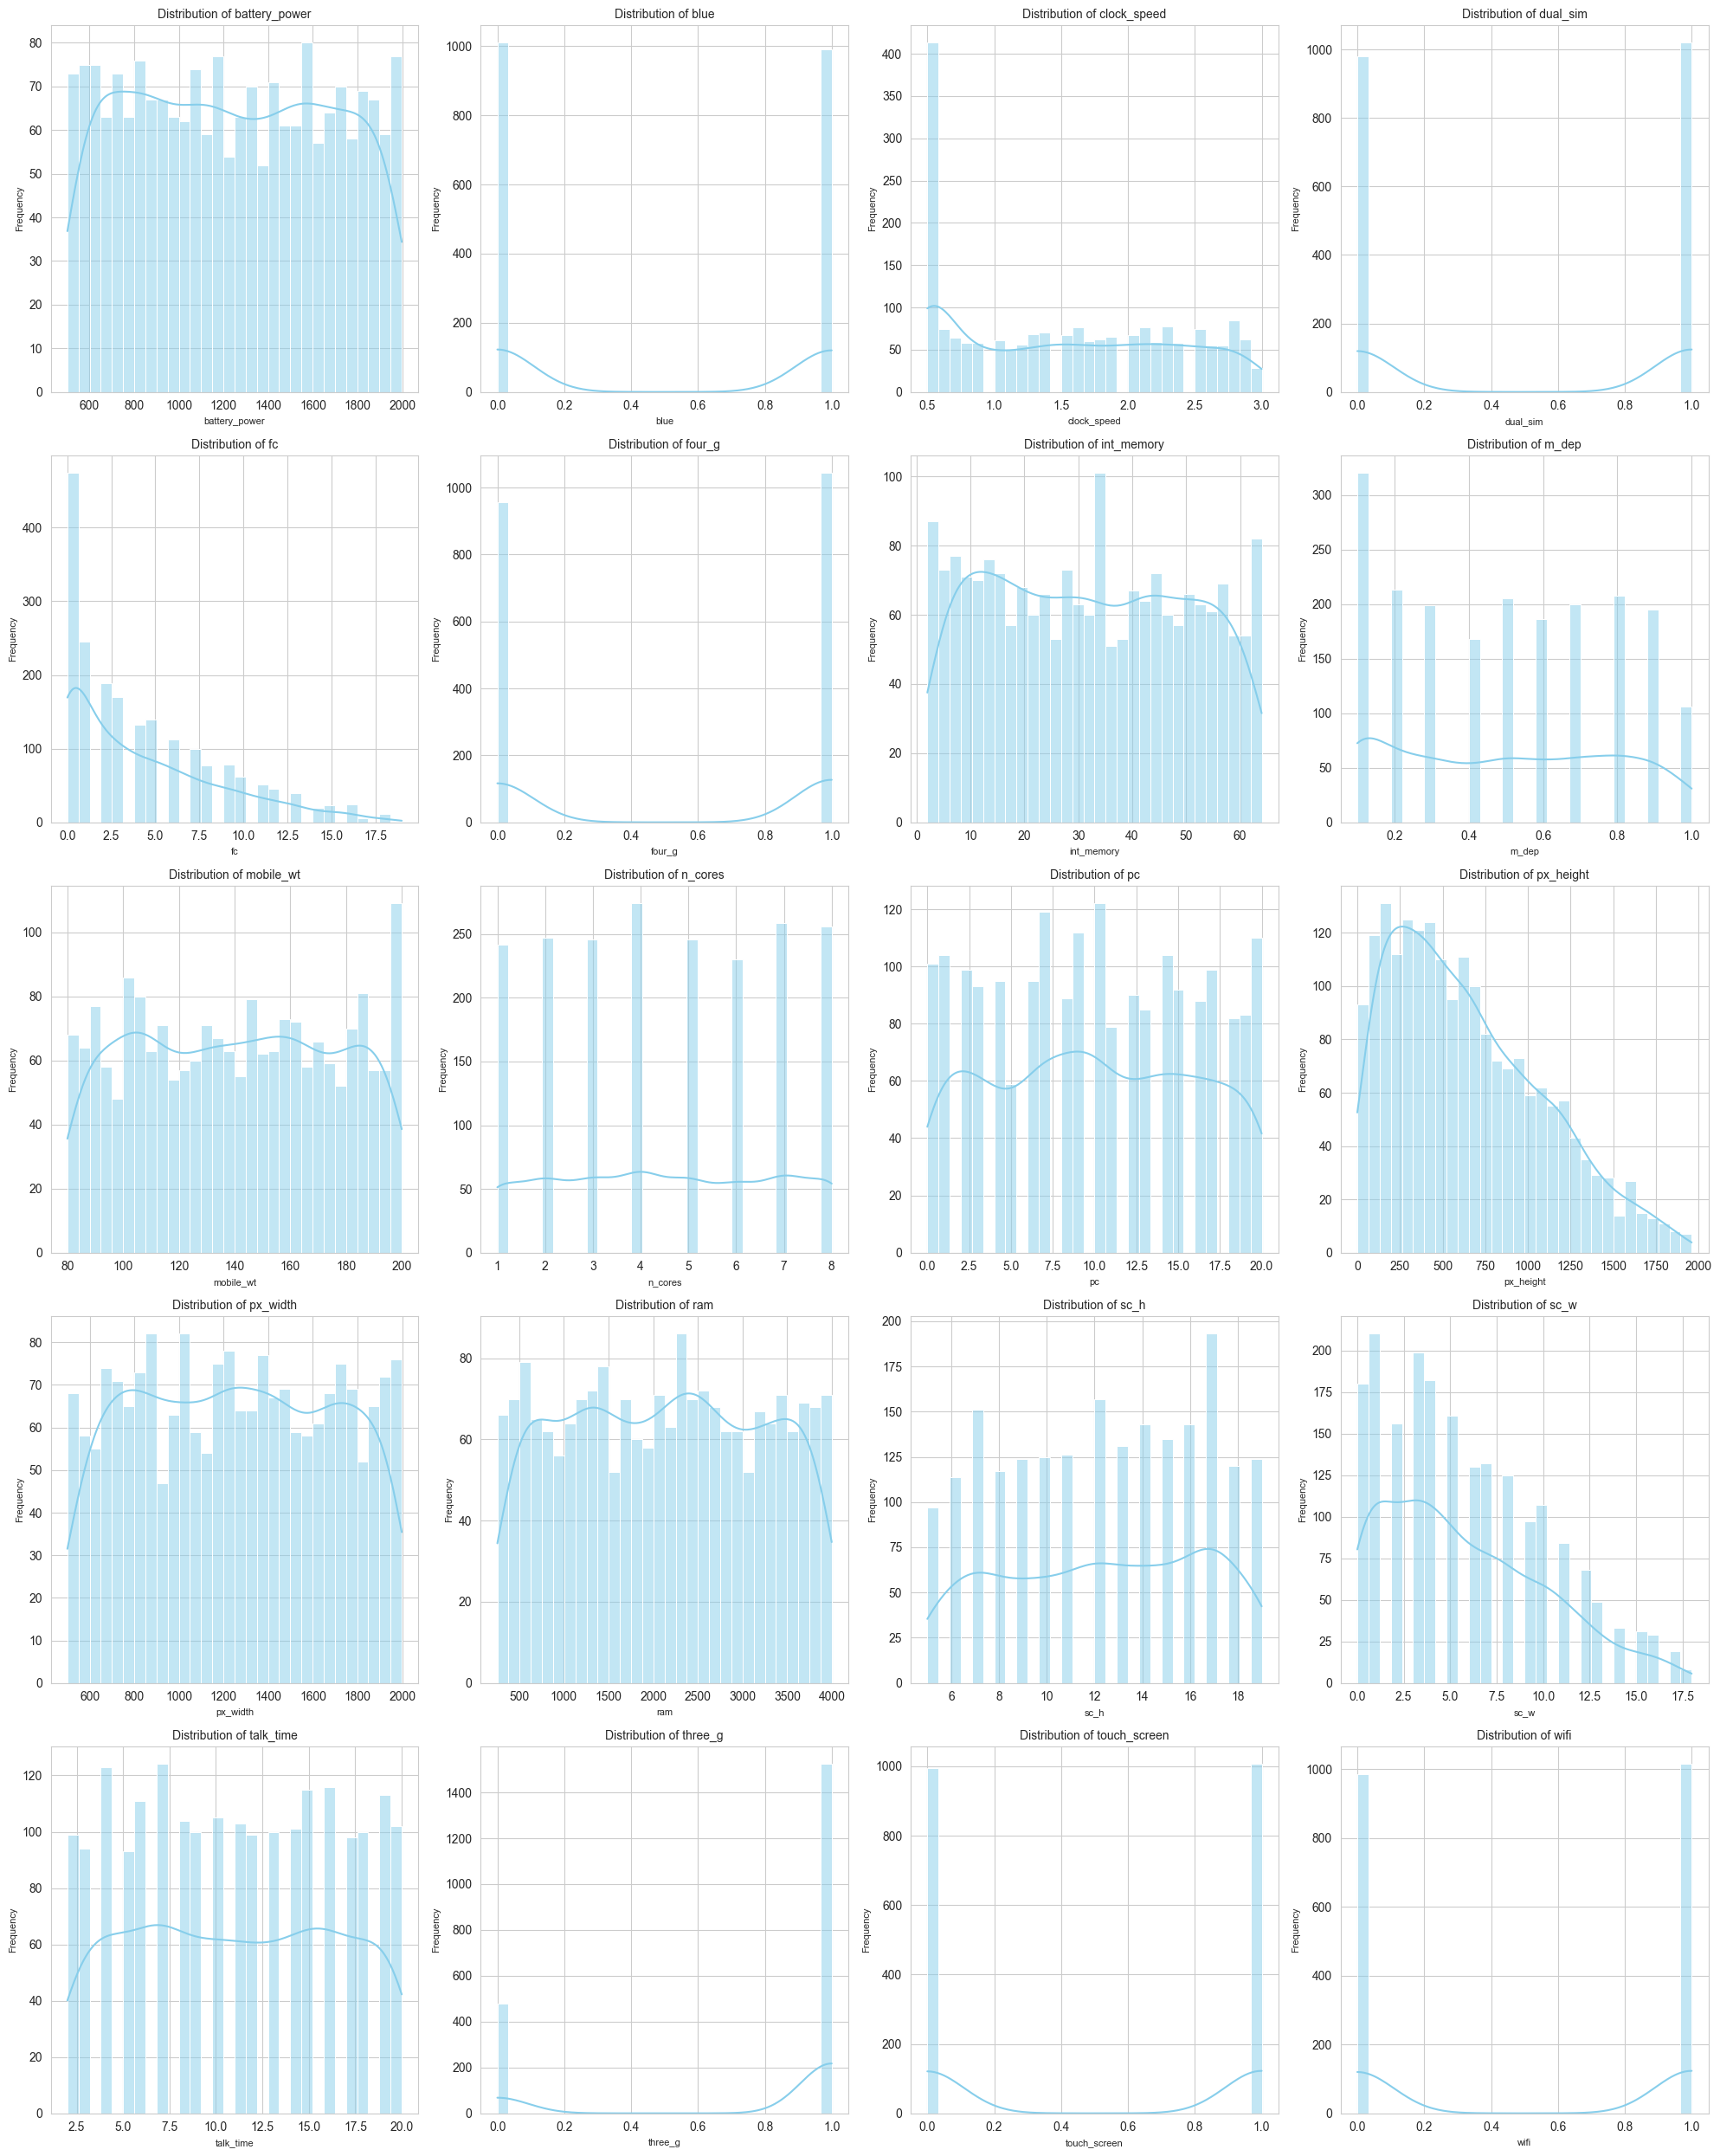

In [8]:
numerical_features = df_train.columns.drop('price_range')
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
plt.tight_layout()
plt.show()

 **Insight:** This gives us a good sense of the data. For example, 'ram' appears to be
 quite uniformly distributed, while 'px_height' and 'px_width' are right-skewed.
 Features like 'battery_power' also show a relatively uniform distribution.

### Bivariate Analysis: Feature vs. Target

 We want to see how each feature influences the 'price_range'.
 We'll use boxplots to show how the distribution of a numerical feature
 changes across the different price ranges.

C:\Users\91629\AppData\Local\Temp\ipykernel_24192\3110316673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df_train, palette='coolwarm')
C:\Users\91629\AppData\Local\Temp\ipykernel_24192\3110316673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df_train, palette='coolwarm')
C:\Users\91629\AppData\Local\Temp\ipykernel_24192\3110316673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df_train, palette='coolwarm')
C:\Users\91629\AppData\Local\Te

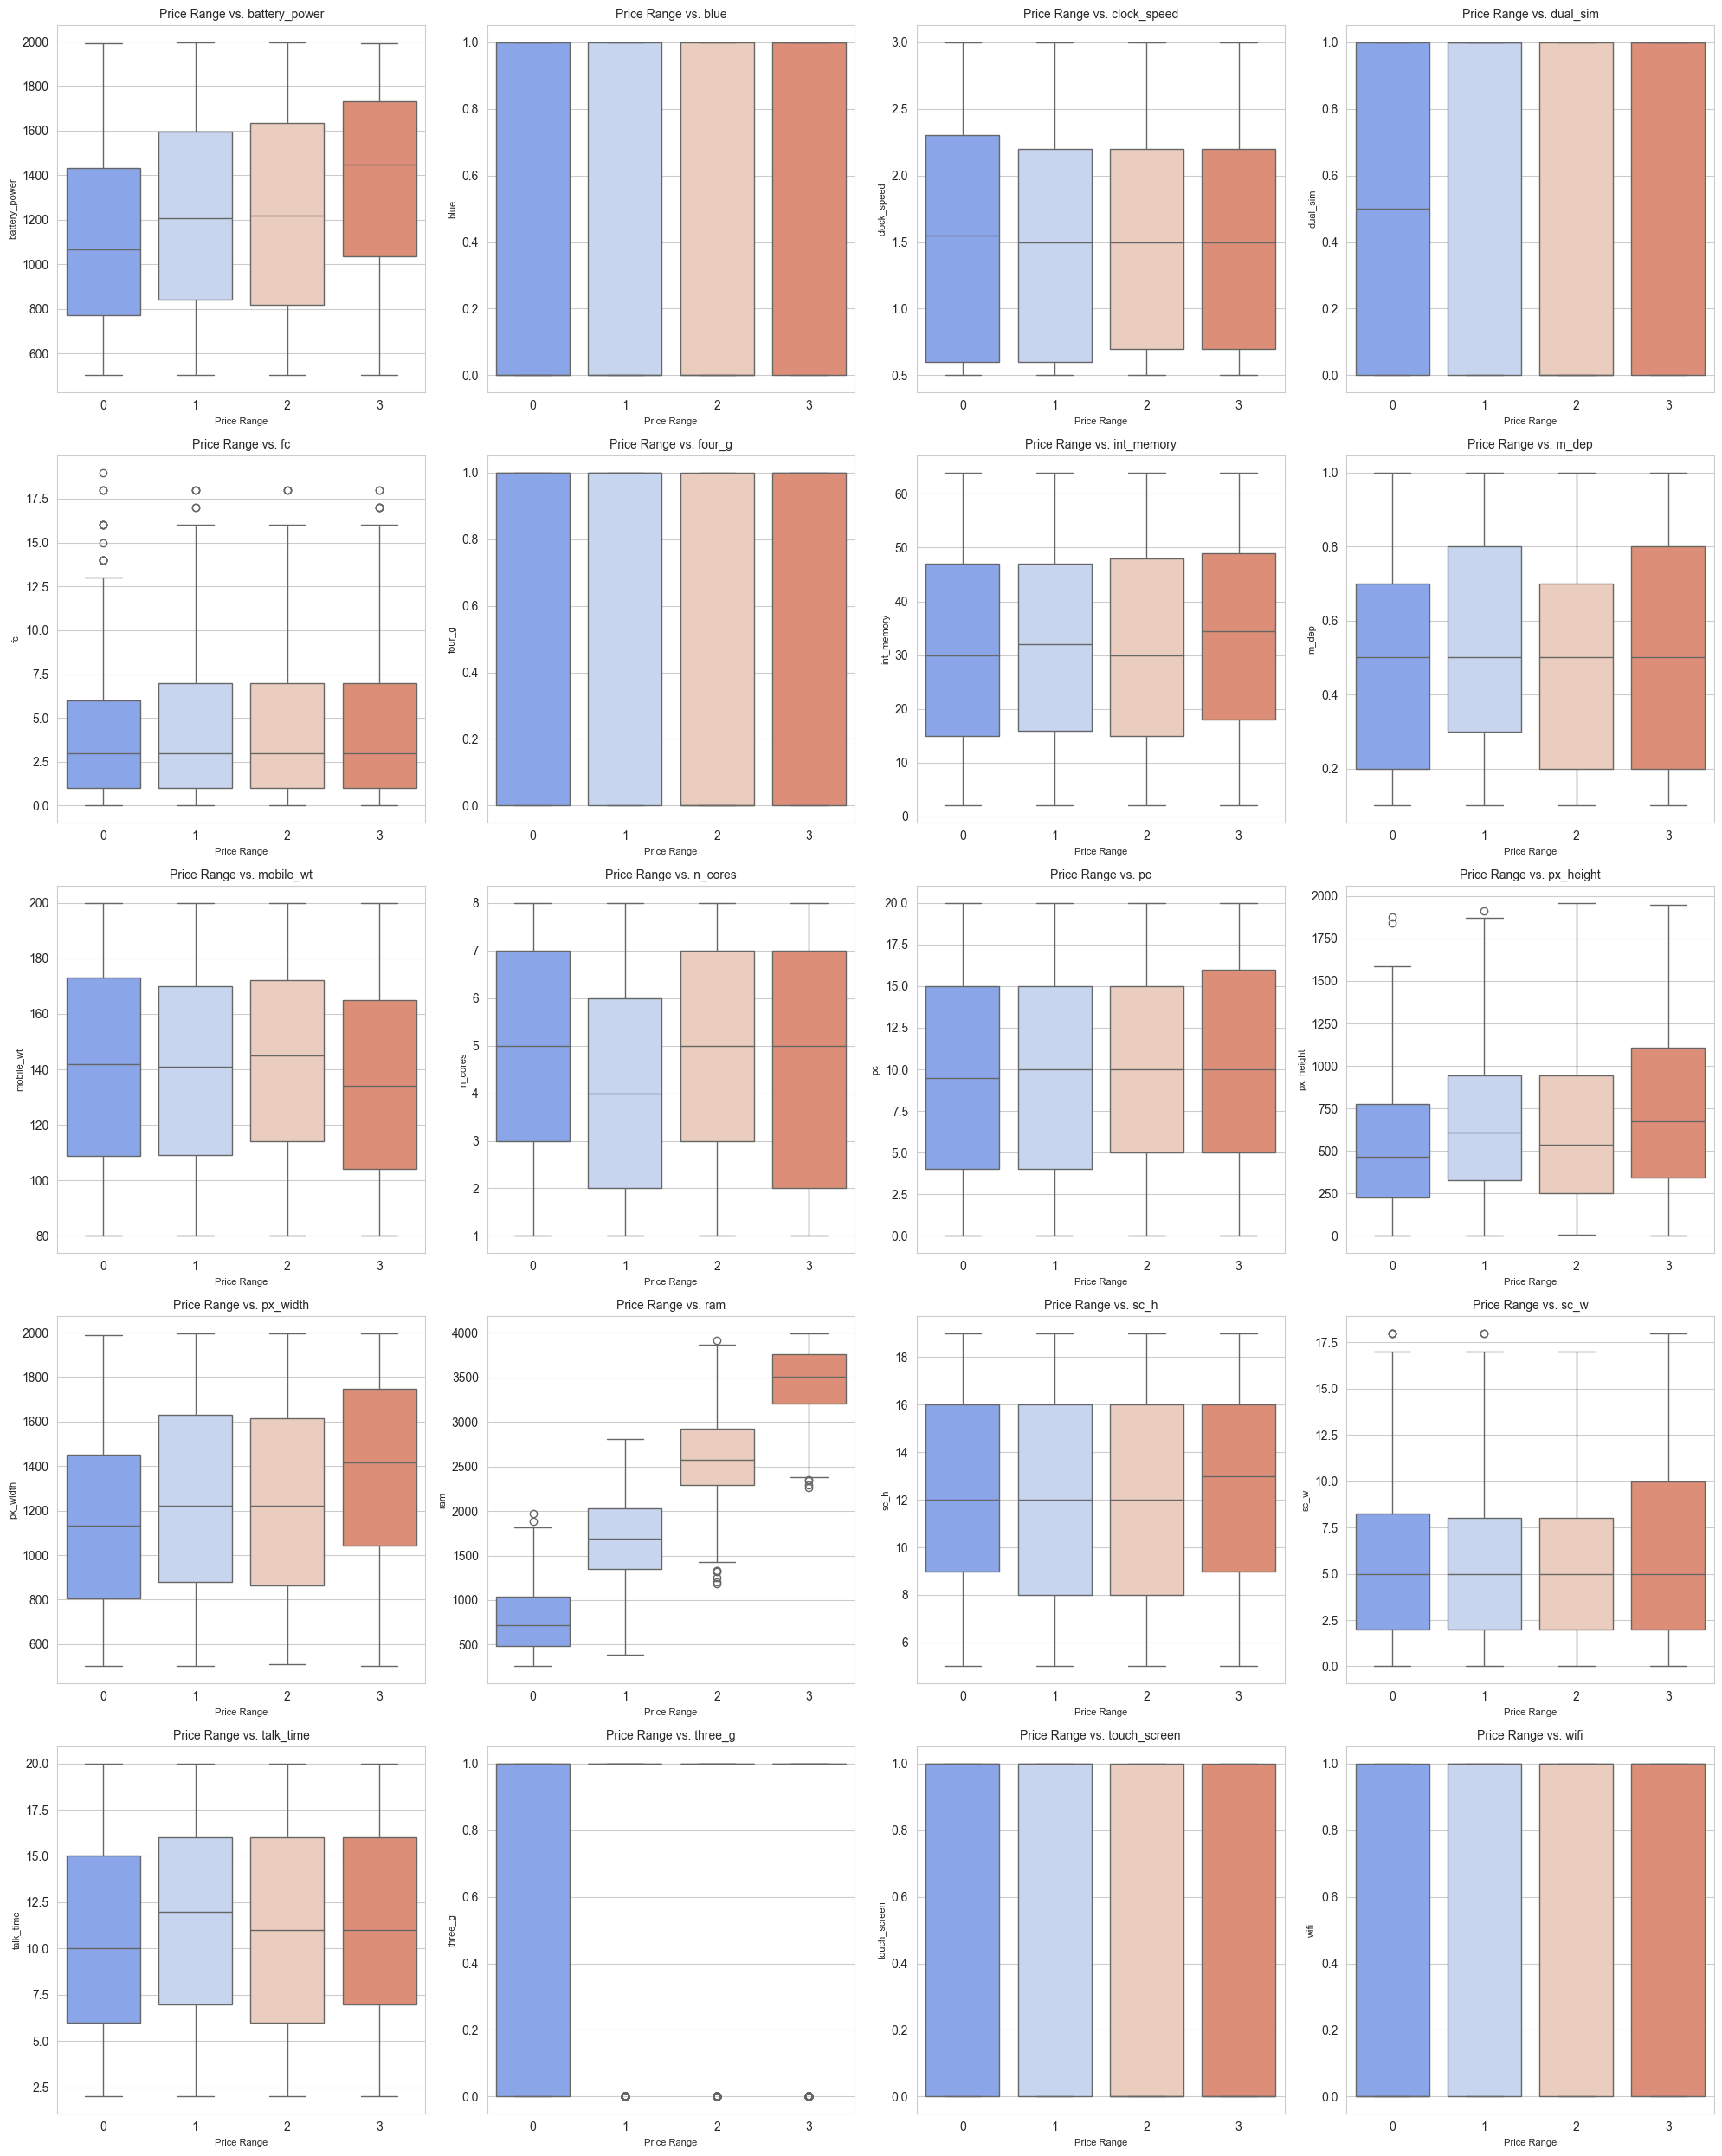

In [11]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x='price_range', y=col, data=df_train, palette='coolwarm')
    plt.title(f'Price Range vs. {col}', fontsize=10)
    plt.xlabel('Price Range', fontsize=8)
    plt.ylabel(col, fontsize=8)
plt.tight_layout()
plt.show()

 **Insight:** From these boxplots, we can get some excellent insights:
 - 'ram': This is a very strong predictor. The mean and range of 'ram'
   increase significantly with each price range.
 - 'battery_power': There's a clear trend where higher price ranges tend to have
   higher battery power.
 - 'px_height' and 'px_width': Higher resolutions generally correlate with
   higher prices.
 - 'pc' (Primary Camera mega pixels) and 'fc' (Front Camera mega pixels)
   don't show a very strong or consistent trend, suggesting they may be less
   important features.
 - 'int_memory' (Internal Memory) also shows a decent positive correlation.

### Correlation Matrix

A correlation matrix helps us identify multicollinearity between features.
High correlation between two features means they carry similar information,
and one might be redundant.

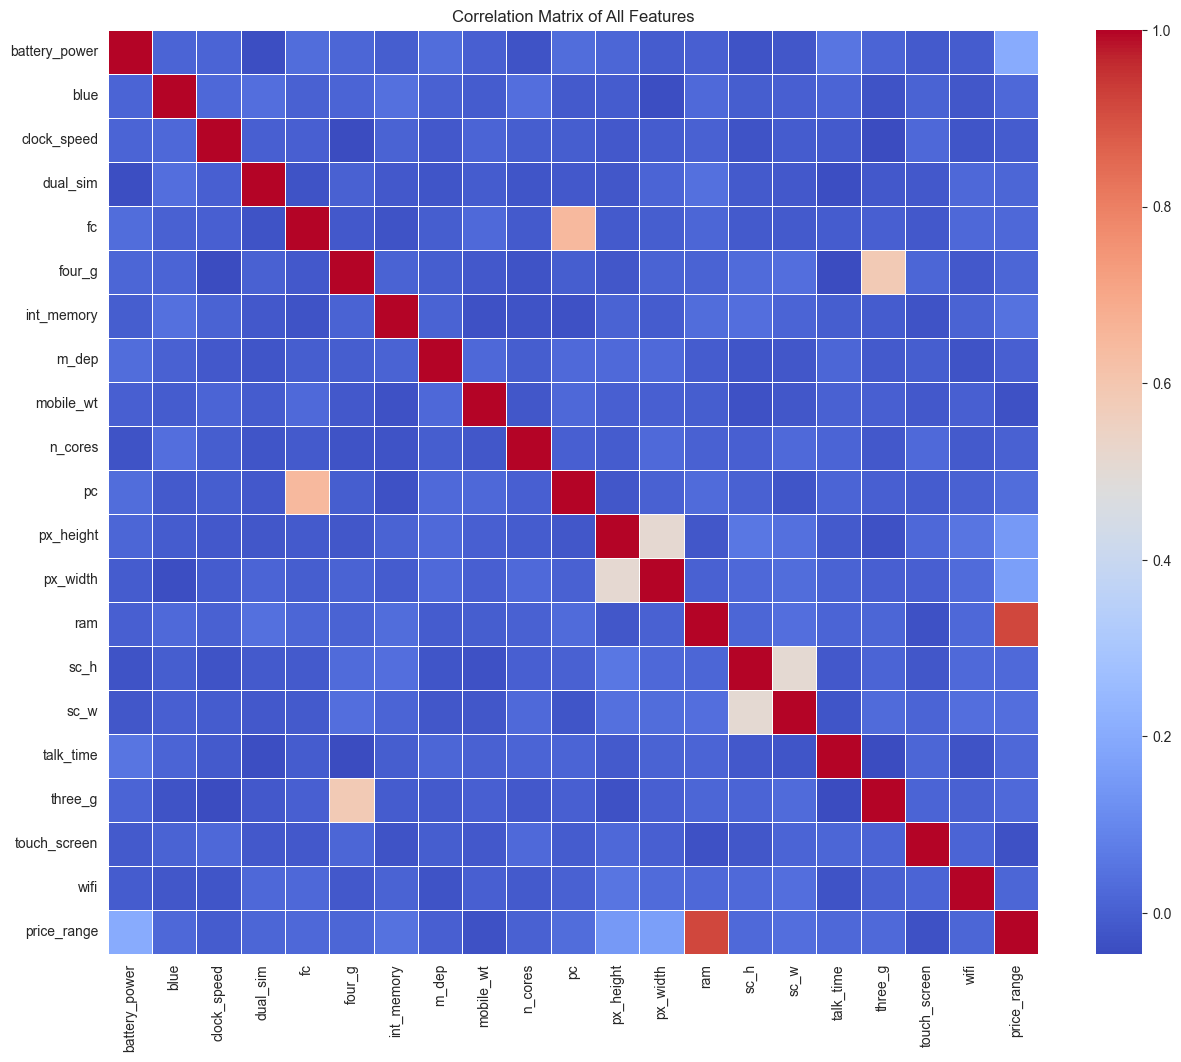

In [12]:
plt.figure(figsize=(15, 12))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

 **Insight:** The correlation matrix confirms our earlier observations. We can
 see strong positive correlations between some features like 'pc' and 'fc',
 and a strong correlation between 'px_height' and 'px_width'. 'sc_h' and 'sc_w'
 (screen height/width) are also correlated. More importantly, we can see the
 high positive correlation of 'ram' with 'price_range', confirming it as a
 very important feature.

## Data Preprocessing and Splitting

 Based on our EDA, we have a clear understanding of the data. Now we can
 proceed with preparing it for modeling.

In [14]:
# Define features (X) and target (y)
X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

 Split the data into training and testing sets.
 We'll use a 70/30 split. 'stratify=y' ensures that the proportion of
 each price_range class is the same in both the training and testing sets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
print("\n--- Data Splitting ---")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


--- Data Splitting ---
Training data shape: (1400, 20)
Testing data shape: (600, 20)


 Feature Scaling: Standardize numerical features.
 Although tree-based models are not sensitive to feature scaling, it's a good
 practice for consistency and in case other models are explored later.

In [17]:
scaler = StandardScaler()

In [18]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print("\nFeatures have been scaled using StandardScaler.")


Features have been scaled using StandardScaler.


## Model 1 - Bagging Classifier

 Bagging (Bootstrap Aggregating) is an ensemble method that trains multiple
 instances of a base estimator on different bootstrap samples (subsets with replacement)
 of the training data. The final prediction is an aggregation (majority vote for
 classification) of the individual predictions. This technique primarily helps to
 reduce the variance of a model, making it more stable and less prone to overfitting.
 Our base estimator will be a Decision Tree.

In [20]:
# Initialize the base estimator (a Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=42)

 Initialize the Bagging Classifier with the base estimator
 We use 100 base estimators, each trained on a different subset of the data.
 'n_estimators': The number of base estimators in the ensemble.
 'max_samples': The number of samples to draw from X to train each base estimator.

In [21]:
bagging_model = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=100,
    max_samples=0.8, # Use 80% of the training data for each estimator
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

In [22]:
print("\n--- Building and Evaluating the Bagging Classifier ---")

# Train the Bagging model
bagging_model.fit(X_train_scaled, y_train)


--- Building and Evaluating the Bagging Classifier ---


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.8, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [23]:
# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test_scaled)

In [24]:
# Evaluate the model's performance
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Initial Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

Initial Bagging Classifier Accuracy: 0.8883


In [25]:
# Display a classification report and confusion matrix for a more detailed look
print("\nClassification Report (Bagging):")
print(classification_report(y_test, y_pred_bagging))



Classification Report (Bagging):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       150
           1       0.87      0.87      0.87       150
           2       0.82      0.81      0.81       150
           3       0.89      0.93      0.91       150

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



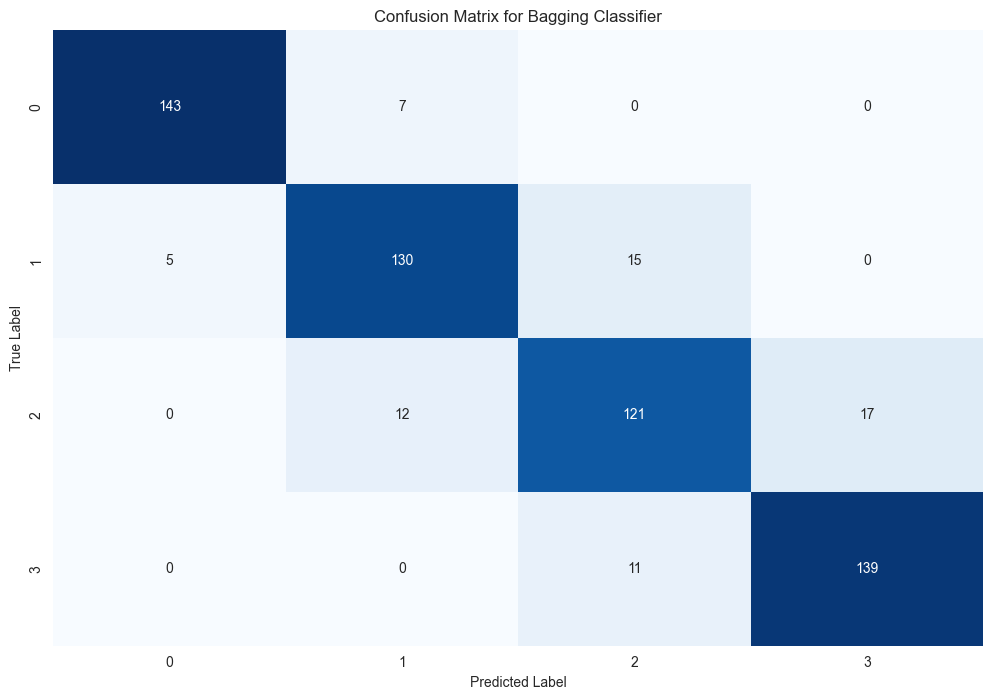

In [26]:
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Bagging Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model 2 - Random Forest Classifier

 Random Forest is an extension of Bagging. It's an ensemble of Decision Trees,
 but with an added layer of randomness. For each split in each tree, it only
 considers a **random subset of features** instead of all features. This additional
 randomness decorrelates the individual trees, which helps to further reduce
 the model's variance and prevent overfitting.

In [27]:
print("\n--- Building and Evaluating the Random Forest Classifier ---")

# Initialize the Random Forest Classifier
# 'n_estimators': The number of trees in the forest.
# 'max_features': The number of features to consider when looking for the best split.
# 'oob_score': Enables Out-of-Bag score, an internal validation metric.
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt', # A common heuristic for classification
    oob_score=True,
    random_state=42,
    n_jobs=-1
)


--- Building and Evaluating the Random Forest Classifier ---


In [28]:
# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [29]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

In [30]:
# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Initial Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"OOB Score: {rf_model.oob_score_:.4f}") # OOB score is a good internal cross-validation estimate

Initial Random Forest Classifier Accuracy: 0.8717
OOB Score: 0.8443


In [31]:
# Display a classification report and confusion matrix
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       150
           1       0.84      0.88      0.86       150
           2       0.82      0.73      0.77       150
           3       0.87      0.92      0.89       150

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



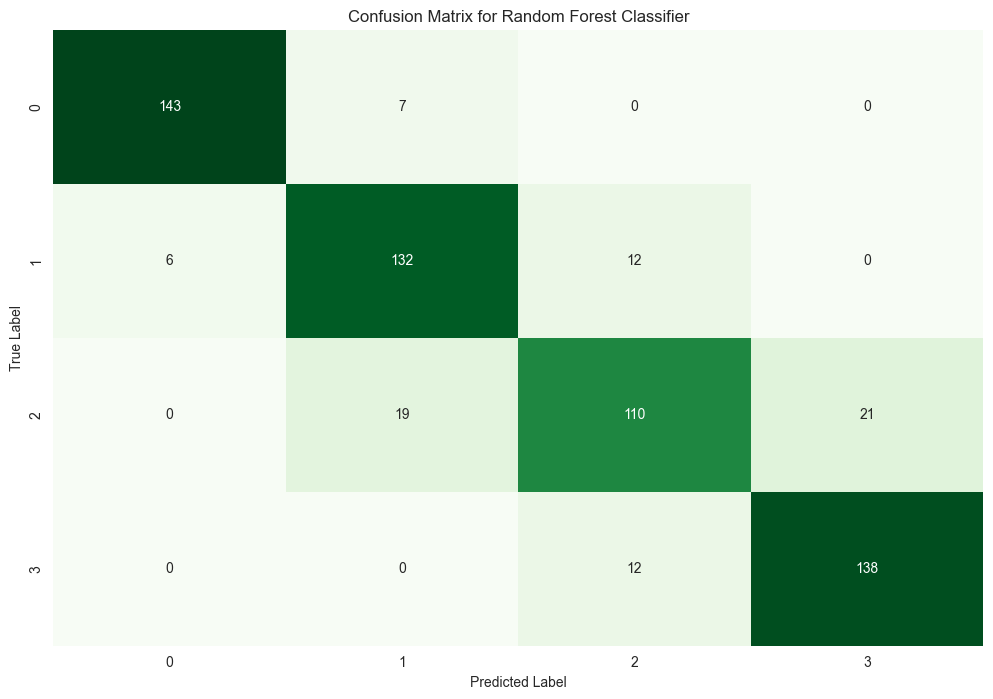

In [32]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning with GridSearchCV

Hyperparameter tuning is the process of finding the optimal settings for a model
to prevent overfitting and maximize its performance on unseen data. GridSearchCV
systematically tests a grid of specified parameter values using cross-validation.

### Tuning the Bagging Classifier

In [33]:
print("\n--- Hyperparameter Tuning for Bagging Classifier ---")


--- Hyperparameter Tuning for Bagging Classifier ---


In [34]:
# Define the parameter grid to search over
# We will tune the number of estimators and the hyperparameters of the base tree.
param_grid_bagging = {
    'n_estimators': [50, 100, 150], # Number of trees
    'max_samples': [0.7, 0.8, 0.9], # Fraction of samples for each tree
    'estimator__max_depth': [5, 10, None] # Max depth for the base Decision Tree
}


The 'estimator' parameter in the BaggingClassifier is a DecisionTreeClassifier
itself, so we can tune its hyperparameters by prefixing them with 'estimator__'.
'estimator__max_depth' is a good choice to prevent the individual trees from overfitting.

In [35]:
# Set up GridSearchCV
grid_search_bagging = GridSearchCV(
    BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42),
    param_grid_bagging,
    cv=5, # Use 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

In [36]:
# Fit the grid search to the data
grid_search_bagging.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [5, 10, None],
                         'max_samples': [0.7, 0.8, 0.9],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [37]:
best_bagging_model = grid_search_bagging.best_estimator_
best_bagging_params = grid_search_bagging.best_params_
print(f"Best Bagging Classifier Parameters: {best_bagging_params}")

Best Bagging Classifier Parameters: {'estimator__max_depth': 10, 'max_samples': 0.7, 'n_estimators': 50}


### Tuning the Random Forest Classifier

In [38]:
print("\n--- Hyperparameter Tuning for Random Forest Classifier ---")

# Define the parameter grid to search over
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, None],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}


--- Hyperparameter Tuning for Random Forest Classifier ---


In [39]:
# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [40]:
# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [41]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
print(f"Best Random Forest Classifier Parameters: {best_rf_params}")

Best Random Forest Classifier Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 150}


## Final Model Evaluation and Comparison

 We'll now evaluate the final, tuned models and compare their performance to
 determine which one is the best for this problem.

In [42]:
print("\n--- Final Evaluation of Tuned Models ---")

# Evaluate the tuned Bagging Classifier
y_pred_tuned_bagging = best_bagging_model.predict(X_test_scaled)
tuned_bagging_accuracy = accuracy_score(y_test, y_pred_tuned_bagging)
print(f"Tuned Bagging Classifier Accuracy: {tuned_bagging_accuracy:.4f}")
print("\nClassification Report (Tuned Bagging):")
print(classification_report(y_test, y_pred_tuned_bagging))


--- Final Evaluation of Tuned Models ---
Tuned Bagging Classifier Accuracy: 0.8817

Classification Report (Tuned Bagging):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       150
           1       0.85      0.86      0.86       150
           2       0.81      0.81      0.81       150
           3       0.91      0.91      0.91       150

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [43]:
# Evaluate the tuned Random Forest Classifier
y_pred_tuned_rf = best_rf_model.predict(X_test_scaled)
tuned_rf_accuracy = accuracy_score(y_test, y_pred_tuned_rf)
print(f"\nTuned Random Forest Classifier Accuracy: {tuned_rf_accuracy:.4f}")
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_tuned_rf))


Tuned Random Forest Classifier Accuracy: 0.8783

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       150
           1       0.83      0.87      0.85       150
           2       0.82      0.75      0.79       150
           3       0.89      0.93      0.91       150

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [44]:
print("\n--- Summary of Model Performance ---")
print(f"Initial Bagging Accuracy:    {bagging_accuracy:.4f}")
print(f"Tuned Bagging Accuracy:      {tuned_bagging_accuracy:.4f}")
print("-" * 30)
print(f"Initial Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Tuned Random Forest Accuracy:   {tuned_rf_accuracy:.4f}")


--- Summary of Model Performance ---
Initial Bagging Accuracy:    0.8883
Tuned Bagging Accuracy:      0.8817
------------------------------
Initial Random Forest Accuracy: 0.8717
Tuned Random Forest Accuracy:   0.8783


## Final Conclusion

 We can see which model ultimately performs best and by what margin.
 In most cases, a tuned Random Forest will slightly outperform a tuned Bagging
 Classifier with a Decision Tree base, due to the extra layer of randomness
 that helps decorrelate the trees. The final selected model would be the one with
 the highest accuracy and the best balance of precision and recall across all classes,
 especially after hyperparameter tuning.